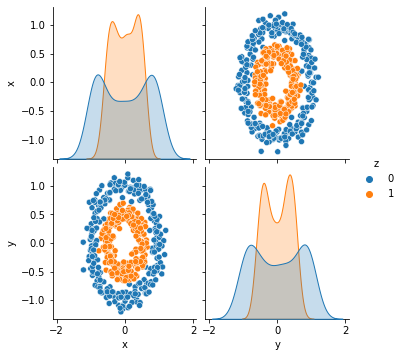

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np
from collections import Counter
from math import sqrt

n = 500
option = 'circles'


if option=='moons':
    features, label = make_moons(n_samples=n,noise=0.1)
elif option=='circles':
    features, label = make_circles(n_samples=n,noise=0.1,factor=0.5)
elif option=='blobs':
    features, label = make_blobs(n_samples=n, centers=5,n_features=2,random_state=17)
    

data = pd.DataFrame({'x':features[:,0],'y':features[:,1],'z':label})
sns.pairplot(data,hue='z')
plt.show()

In [10]:
# Loop through each point and calculate the distance between the rest
# determine the classification on the nearest K points
# Use majority class labels of the nearest points

data

,x,y,z
0,-0.509333,0.867928,0
1,0.162914,0.973364,0
2,-0.179003,-0.465686,1
3,0.246906,0.963583,0
4,1.163306,-0.203349,0
...,...,...,...
495,-0.407618,-0.325598,1
496,-0.048545,0.694329,1
497,-0.362433,-0.852816,0
498,0.316757,-0.325131,1


In [3]:
def knn(data, k):
    prediction = []
    for i in range(len(data)):
        distance = []
        for j in range(len(data)):
            distance.append(sqrt((data.loc[i][0] - data.loc[j][0])**2+(data.loc[i][1]-data.loc[j][1])**2))
        prediction.append(Counter(np.array(data.z)[np.array(distance).argsort()[1:k+1]]).most_common()[0][0])
    return prediction

In [4]:
def knn_readable(data, k):
    prediction = []
    for i in range(len(data)):
        distance = []
        comparison_row = data.loc[i] 
        for j in range(len(data)):
            row = data.loc[j]
            distance = sqrt((comparison_row[0] - row[0])**2+(comparison_row[1]-row[1])**2) # sqrt((x2-x1)**2 + (y2-y1)**2)
            distance.append(distance)
        distance_array = np.array(distance) # Create an array of the distance values from the comparison row
        closest_k_indexes = distance_array.argsort()[1:k+1] # Find those closest k points to the comparison row
        closest_data = np.array(data.z)[closest_k_indexes] # Find the classification of those closest k points
        label = Counter(closest_data).most_common()[0][0] # Assign the classification most common to the label
        prediction.append(label)
    return prediction

In [5]:
from sklearn.metrics import accuracy_score
prediction = knn(data, 10)
score = accuracy_score(data.z, prediction)
print('Accuracy Score:', score)

Accuracy Score: 0.986


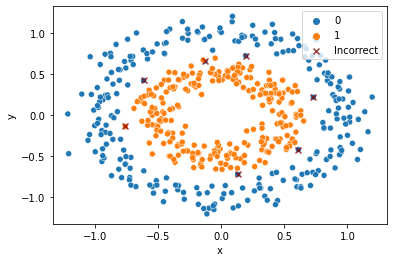

In [9]:
def assess(P):
    x = np.array(data.x); y = np.array(data.y); z = np.array(data.z)
    plt.scatter(x[prediction != z],y[prediction != z],marker='x',color='darkred',alpha=0.75,label='Incorrect')
    plt.legend(loc = 'upper right')

sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'z')
assess(prediction)
plt.savefig('knn.jpg')
plt.show()


# sns.scatterplot(data = data, x = 'x', y = 'y', hue = prediction)
# plt.show()